In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
bank_data=pd.read_csv('bank-full.csv')
bank_data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [4]:
bank_data.shape

(45211, 17)

In [5]:
bank_data.info()
# Out of 17 attributes only 7 are numerical; remaining columns are categorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank_data.isnull().values.any()
#there is no missing values;every column has equal number of entries.

False

In [7]:
# 5 Point summery of the data set

bank_data.describe()

#Here we get summery of only numerical columns.

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [8]:
print(bank_data.Target.value_counts())
#Looking at the 'YES' and 'NO' counts in our target column we can say the there is 'huge data imbalance'.
#This imbalance in TARGET column is very obvious.bcoz expecting that 50% or more of total contacted people 
#may subscribe to term deposite is a rare case.

no     39922
yes     5289
Name: Target, dtype: int64


In [9]:
#here we can get a look at the distribution of data in different categories and subcategories.
print(bank_data.job.value_counts())
print(bank_data.marital.value_counts())
print(bank_data.education.value_counts())
print(bank_data.default.value_counts())
print(bank_data.housing.value_counts())
print(bank_data.loan.value_counts())
print(bank_data.contact.value_counts())
print(bank_data.month.value_counts())
print(bank_data.poutcome.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


In [10]:
bank_data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [11]:
#lets convert the columns with 'object' data type into categorical variable
for feature in bank_data.columns: #loops through all columns in the dataframe 
    if bank_data[feature].dtype=='object': #only appky for columns in categorical string
        bank_data[feature]=pd.Categorical(bank_data[feature])#replace strings with an integer

In [12]:
replaceStruct={
            "marital":{"married":1,"single":2,"divorced":3},
            "education":{ "primary":1,"secondary":2, "tertiary":3, "unknown":-1},
            "default":{"no":0,"yes":1}, "housing":{"no":0,"yes":1},
            "loan":{"no":0,"yes":1},"contact":{"cellular":1,"telephone":2,"unknown":-1},
                "poutcome":{"failure":0,"success":1,"other":2,"unknown":-1},
                "Target":{"no":0,"yes":1} 
                    }
oneHotCols=["job","month"]

In [13]:
bank_data=bank_data.replace(replaceStruct)

In [14]:
bank_data=pd.get_dummies(bank_data,columns=oneHotCols)
bank_data.head()
# Here we havecreated one hot encoded columns for job and month bcoz these columns have more number of sub-groups.
# Also we have converted the non numericentries into numeric by assignung each sub category a number.

age  marital  education  default  balance  housing  loan  contact  day  \
0   58        1          3        0     2143        1     0       -1    5   
1   44        2          2        0       29        1     0       -1    5   
2   33        1          2        0        2        1     1       -1    5   
3   47        1         -1        0     1506        1     0       -1    5   
4   33        2         -1        0        1        0     0       -1    5   

   duration  ...  month_dec  month_feb  month_jan  month_jul  month_jun  \
0       261  ...          0          0          0          0          0   
1       151  ...          0          0          0          0          0   
2        76  ...          0          0          0          0          0   
3        92  ...          0          0          0          0          0   
4       198  ...          0          0          0          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  
0          0          1          0          0          0  
1          0          1          0          0          0  
2          0          1          0          0          0  
3          0          1          0          0          0  
4          0          1          0          0          0  

[5 rows x 39 columns]

In [15]:
#In the above Table youcan see that the our Target column is somewhere in between so many columns but not at the end.
#Moving Target column to the right most position.
cols = list(bank_data.columns.values) #Make a list of all of the columns in the bank_data
cols.pop(cols.index('Target')) #Remove 'Target' column from list
bank_data = bank_data[cols+['Target']] #Create new dataframe with columns in the order you want

print(bank_data.columns.values)

['age' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'job_admin.' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'job_unknown' 'month_apr'
 'month_aug' 'month_dec' 'month_feb' 'month_jan' 'month_jul' 'month_jun'
 'month_mar' 'month_may' 'month_nov' 'month_oct' 'month_sep' 'Target']


In [16]:
bank_data.nunique()

age                    77
marital                 3
education               4
default                 2
balance              7168
housing                 2
loan                    2
contact                 3
day                    31
duration             1573
campaign               48
pdays                 559
previous               41
poutcome                4
job_admin.              2
job_blue-collar         2
job_entrepreneur        2
job_housemaid           2
job_management          2
job_retired             2
job_self-employed       2
job_services            2
job_student             2
job_technician          2
job_unemployed          2
job_unknown             2
month_apr               2
month_aug               2
month_dec               2
month_feb               2
month_jan               2
month_jul               2
month_jun               2
month_mar               2
month_may               2
month_nov               2
month_oct               2
month_sep               2
Target      

In [17]:
plt.rcParams['figure.figsize']=[15,10]

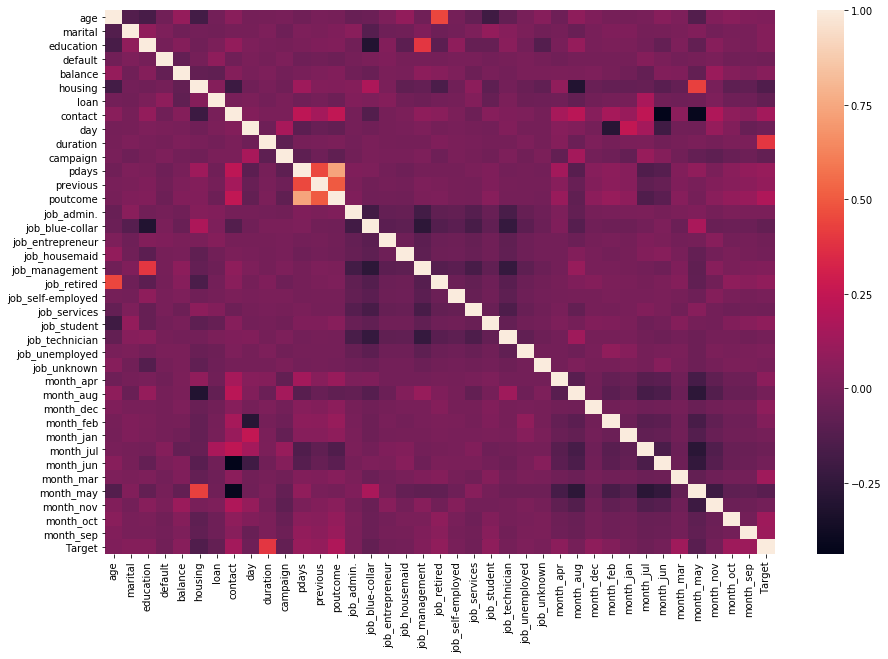

In [18]:
corr=bank_data.corr()
sns.heatmap(corr, annot=False, fmt='.2f')
#its difficult to understand the relation between variable using heatmap with many number of columns in our dataset.

In [19]:
#Lets calculate the feature importance of each feature and take only top 10 features that contribute to further analysis.
#This will fecilitate the model to rum faster and more efficiently.
Xtemp=bank_data.iloc[:,0:37] #independent features
ytemp=bank_data.iloc[:,-1] ##Target column i.e 'Target'

from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(Xtemp,ytemp)
print(model.feature_importances_)
print("Names of our all independent feature columns are = ",Xtemp.columns)
print("Name of our target column is = ",ytemp.name)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.08782459 0.0295166  0.03735664 0.00302768 0.08686093 0.02549466
 0.0130228  0.0285957  0.09204055 0.24405483 0.05540461 0.03817479
 0.0196329  0.06014448 0.01001727 0.00874125 0.00437873 0.00405767
 0.01089268 0.00660455 0.00600005 0.00737303 0.00613074 0.01046802
 0.00516645 0.0017262  0.00977151 0.00917998 0.00402747 0.00804414
 0.00494112 0.00878064 0.01050161 0.01405621 0.00871013 0.00758792
 0.01169086]
Names of our all independent feature columns are =  Index(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_

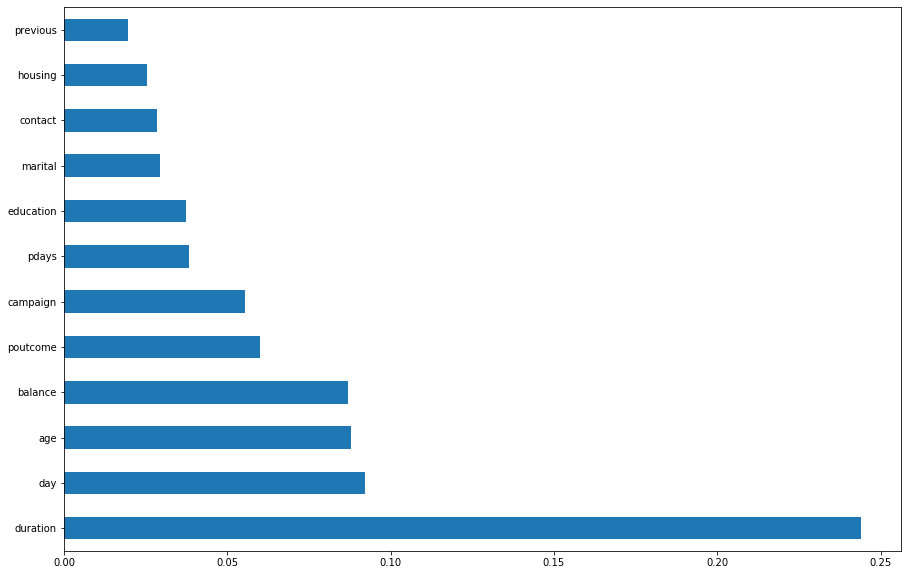

In [20]:
#plot Graph of feature importances for better visualisation
feat_importances=pd.Series(model.feature_importances_,index=Xtemp.columns)
feat_importances.nlargest(12).plot(kind='barh') # extracting top 12 features that are contributing to our Target column.

In [21]:
# Lets drop all the unwanted columns and only keep the top 10 columns which are contrubuting to our Target column.
# Thisstep will improve the efficiency of the models which we will create later.
bank_data.drop(columns=['default','housing','loan','previous' ,
 'job_admin.', 'job_blue-collar' ,'job_entrepreneur' ,'job_housemaid',
 'job_management', 'job_retired' ,'job_self-employed', 'job_services',
 'job_student', 'job_technician' ,'job_unemployed' ,'job_unknown', 'month_apr',
 'month_aug', 'month_dec' ,'month_feb' ,'month_jan' ,'month_jul' ,'month_jun',
 'month_mar', 'month_may' ,'month_nov', 'month_oct' ,'month_sep'],inplace=True)


In [22]:
bank_data.head()

age  marital  education  balance  contact  day  duration  campaign  pdays  \
0   58        1          3     2143       -1    5       261         1     -1   
1   44        2          2       29       -1    5       151         1     -1   
2   33        1          2        2       -1    5        76         1     -1   
3   47        1         -1     1506       -1    5        92         1     -1   
4   33        2         -1        1       -1    5       198         1     -1   

   poutcome  Target  
0        -1       0  
1        -1       0  
2        -1       0  
3        -1       0  
4        -1       0

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


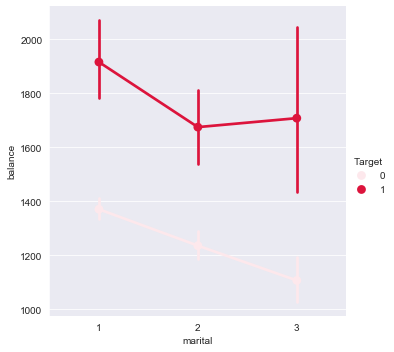

In [23]:
sns.set_style("darkgrid")
sns.factorplot(x='marital',y='balance',hue='Target',data=bank_data,color='crimson')
#"married":1,"single":2,"divorced":3
#this graph shows married people have more probability of taking loan.

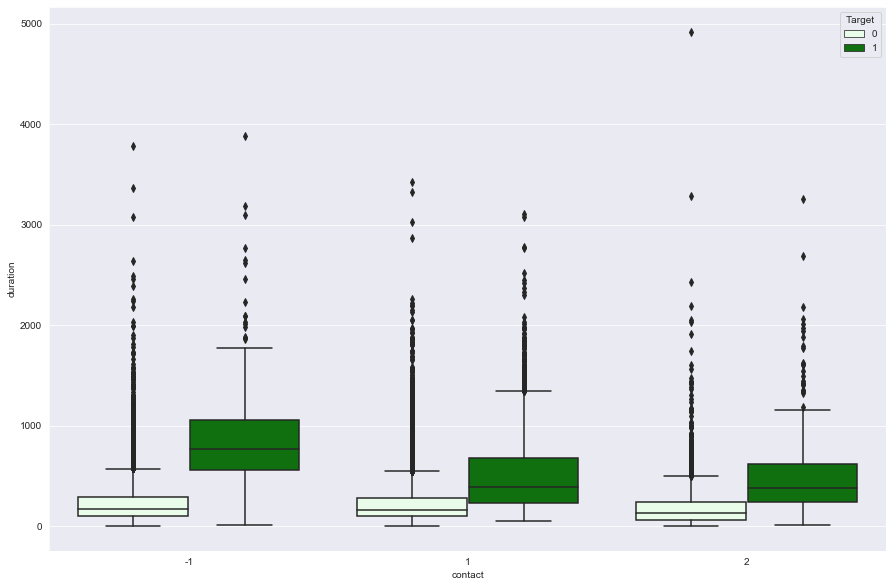

In [24]:
sns.set_style("darkgrid")
sns.boxplot(x='contact',y='duration',hue='Target',data=bank_data,color='green')
#"cellular":1,"telephone":2,"unknown":-1
#most of the 'contact' established with customer falls in unknown category.

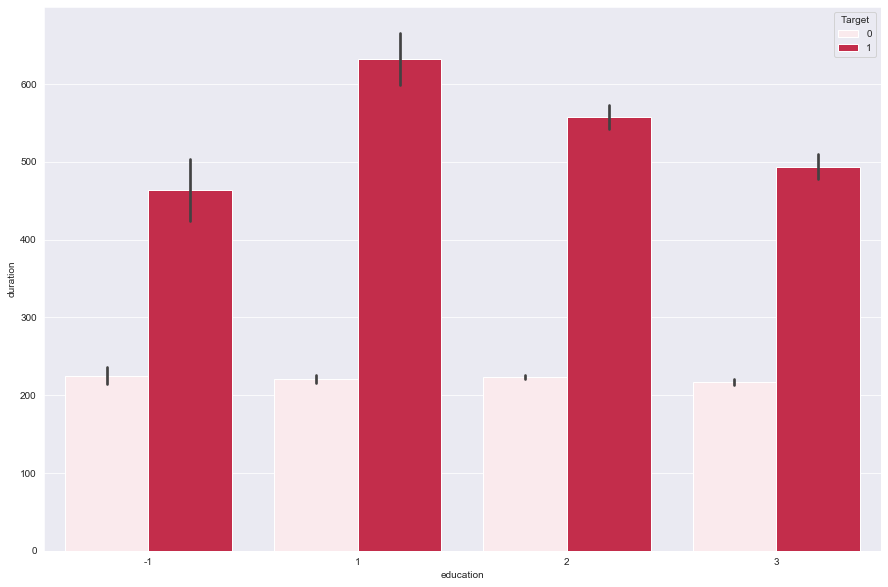

In [25]:
sns.set_style("darkgrid")
sns.barplot(x='education',y='duration',hue='Target',data=bank_data,color='crimson')

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


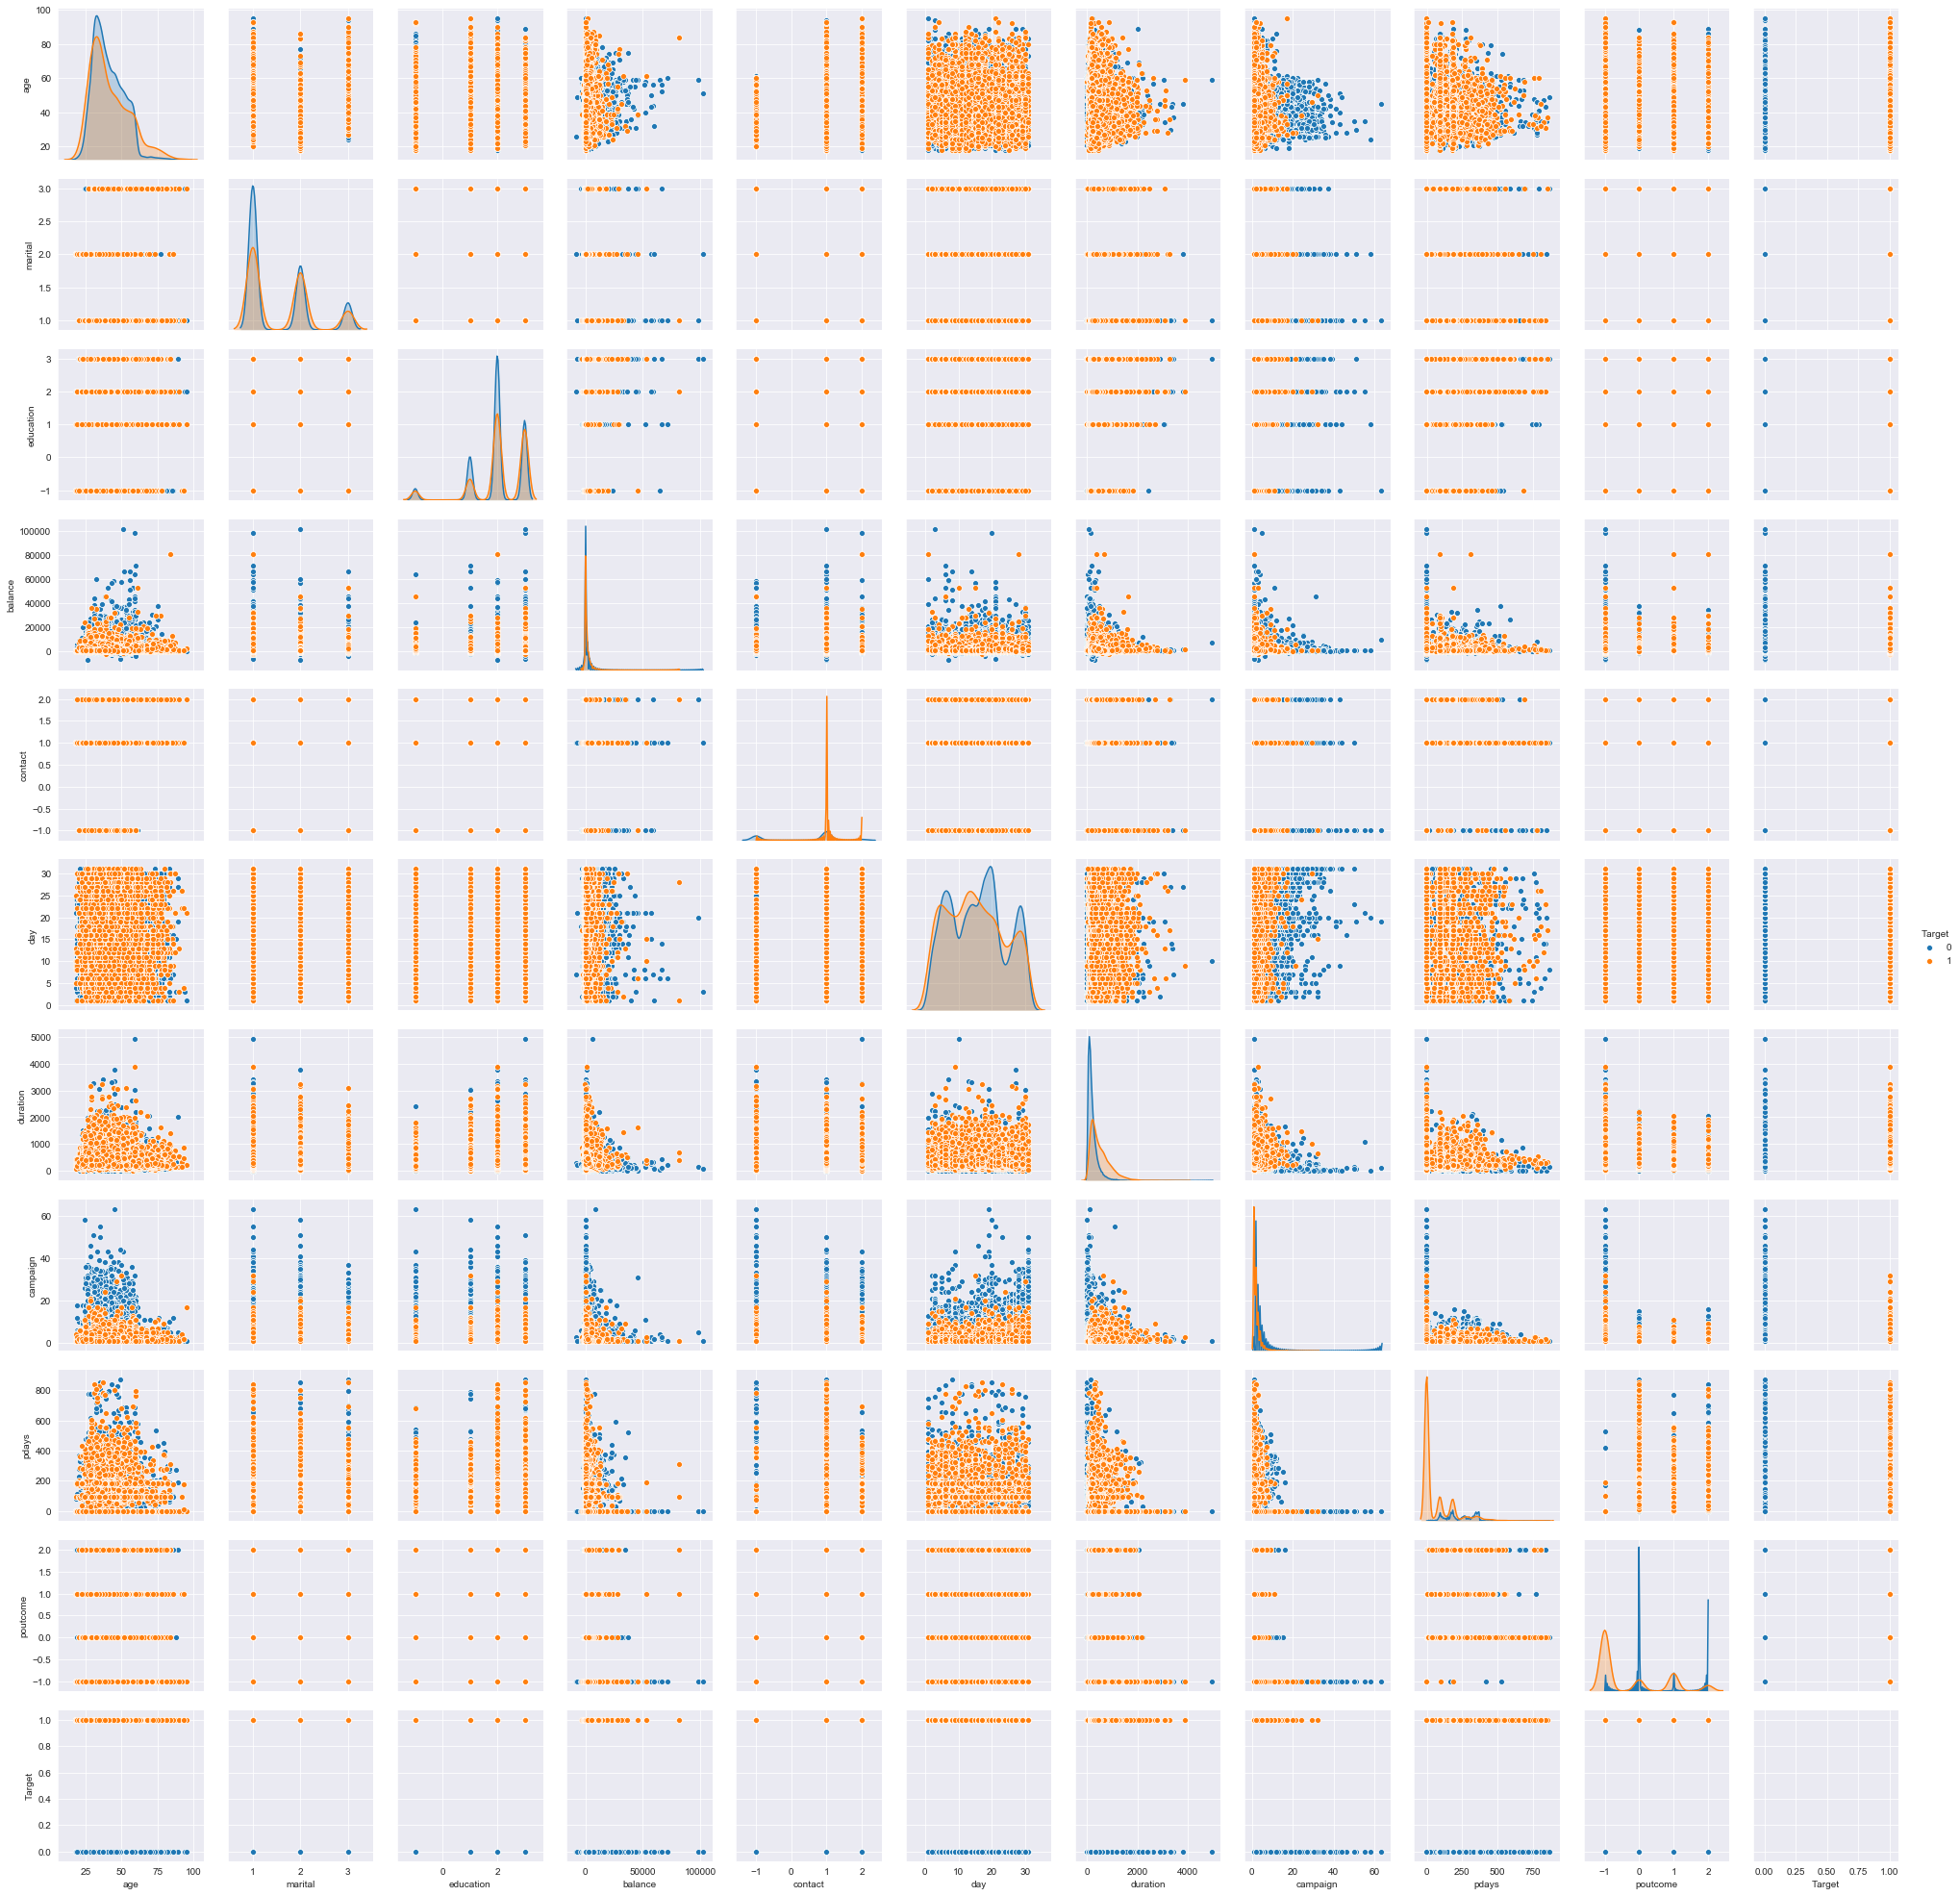

In [26]:
sns.pairplot(bank_data,hue="Target")
# This pairplot shows the correlation between every feature with 'target' taken as hue. All the selected top10 feature shows
#promint correlation with Target variable.

In [27]:
#lets split the dataset
X=bank_data.drop("Target",axis=1)
y=bank_data.pop("Target")
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

   # Building Decision Tree Model #

In [28]:
#we will build our model using DecisionTreeClassifier function. Using default 'Gini' criteria to split.
dTree= DecisionTreeClassifier(criterion='gini',random_state=1)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [29]:
#scoring the decision tree
print(dTree.score(X_train,y_train))
print(dTree.score(X_test,y_test))

1.0
0.862208787968151


In [30]:
#visualizing the decision tree
from sklearn.tree import export_graphviz
train_char_label=['No','Yes']
Bank_Tree_File= open('bank_tree.dot','w')
dot_data=tree.export_graphviz(dTree,out_file=Bank_Tree_File,feature_names=list(X_train),class_names=list(train_char_label))
Bank_Tree_File.close()

In [31]:
from IPython.display import Image
from os import system
from subprocess import call
import pydotplus

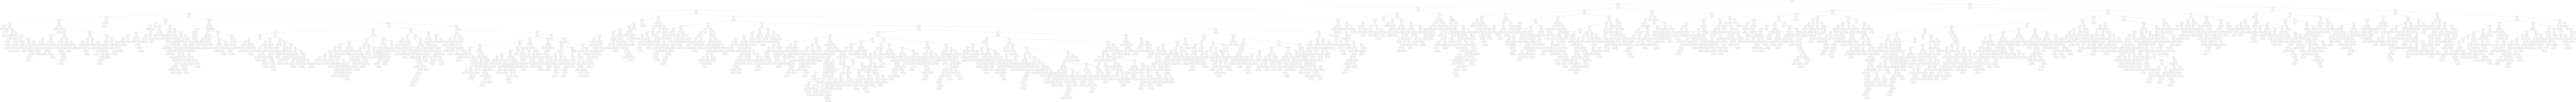

In [304]:
retCode=system("dot -Tpng bank_tree.dot -o bank_tree.png")
if(retCode>0):
    print("system command returning error:"+str(retCode))
else:
    display(Image("bank_tree.png"))
#Visualization is difficult to fit into small space.

In [32]:
#Reducing overfitting 
dTreeR = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
dTreeR.fit(X_train,y_train)
print('Train score= ',dTreeR.score(X_train,y_train))
print('test score= ',dTreeR.score(X_test,y_test))

Train score=  0.8952507346667931
test score=  0.8973016809200826


In [33]:
train_char_label=['No','Yes']
Bank_Tree_FileR= open('bank_treeR.dot','w')
dot_data=tree.export_graphviz(dTreeR,out_file=Bank_Tree_FileR,feature_names=list(X_train),class_names=list(train_char_label))
Bank_Tree_FileR.close()

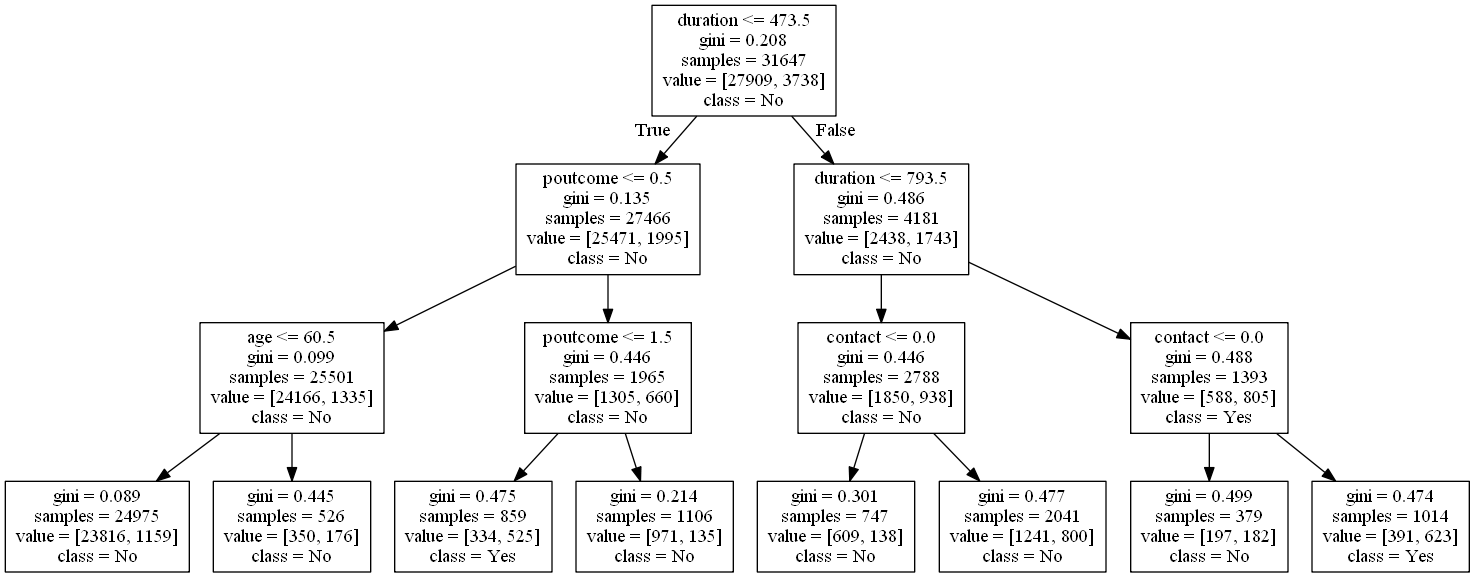

In [308]:
retCode=system("dot -Tpng bank_treeR.dot -o bank_treeR.png")
if(retCode>0):
    print("system command returning error:"+str(retCode))
else:
    display(Image("bank_treeR.png"))

score of Decision tree =  0.8973016809200826
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12013
           1       0.60      0.32      0.41      1551

    accuracy                           0.90     13564
   macro avg       0.76      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564



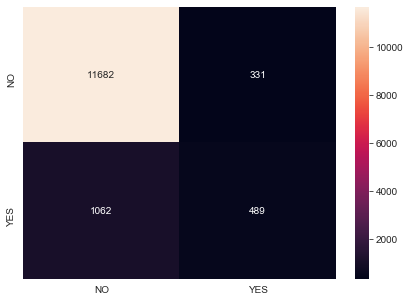

In [34]:
print('score of Decision tree = ',dTreeR.score(X_test,y_test))
y_predict = dTreeR.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in["NO","YES"]], columns=[i for i in ["NO","YES"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

from sklearn.metrics import classification_report
yhat = dTreeR.predict(X_test)
print(classification_report(y_test,yhat))

# Bagging #

train score= 0.8969570575409992
test score= 0.898997345915659
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12013
           1       0.59      0.37      0.45      1551

    accuracy                           0.90     13564
   macro avg       0.76      0.67      0.70     13564
weighted avg       0.88      0.90      0.89     13564



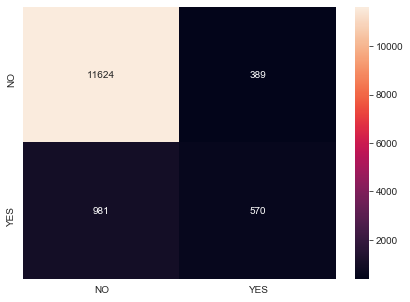

In [35]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier(base_estimator=dTreeR, n_estimators=50, random_state=1)
bgcl=bgcl.fit(X_train,y_train)
y_predict=bgcl.predict(X_test)
print('train score=',bgcl.score(X_train,y_train))
print('test score=',bgcl.score(X_test,y_test))
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ["NO","YES"]], columns=[i for i in ["NO","YES"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

from sklearn.metrics import classification_report
yhat = bgcl.predict(X_test)
print(classification_report(y_test,yhat))

# AdaBoosting #

train score= 0.8984421904129933
test score= 0.8989236213506341
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12013
           1       0.60      0.35      0.44      1551

    accuracy                           0.90     13564
   macro avg       0.76      0.66      0.69     13564
weighted avg       0.88      0.90      0.89     13564



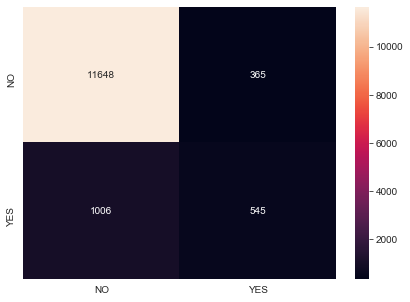

In [37]:
from sklearn.ensemble import AdaBoostClassifier
abcl= AdaBoostClassifier(n_estimators=50,random_state=1)
abcl=abcl.fit(X_train,y_train)
y_predict=abcl.predict(X_test)
print('train score=',abcl.score(X_train,y_train))
print('test score=',abcl.score(X_test,y_test))
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ["NO","YES"]], columns=[i for i in ["NO","YES"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

from sklearn.metrics import classification_report
yhat = abcl.predict(X_test)
print(classification_report(y_test,yhat))

# GradientBoost #

train score= 0.9041299333270136
test score= 0.9018726039516367
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.63      0.35      0.45      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



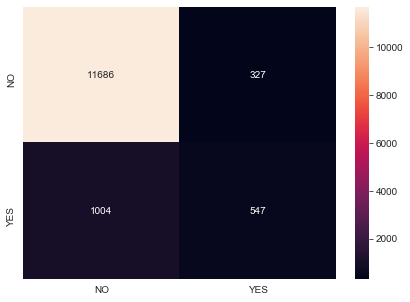

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl= GradientBoostingClassifier(n_estimators=50,random_state=1)
gbcl=gbcl.fit(X_train,y_train)
y_predict=gbcl.predict(X_test)
print('train score=',gbcl.score(X_train,y_train))
print('test score=',gbcl.score(X_test,y_test))
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ["NO","YES"]], columns=[i for i in ["NO","YES"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

from sklearn.metrics import classification_report
yhat = gbcl.predict(X_test)
print(classification_report(y_test,yhat))


# Random Forest Classifier #

train score= 0.9995892185673207
test score= 0.9015777056915364
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.61      0.38      0.47      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



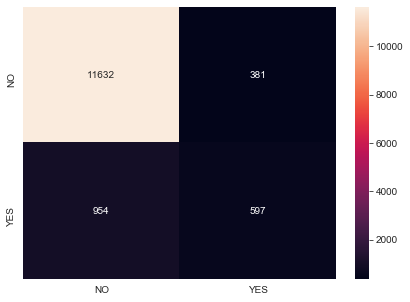

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfcl= RandomForestClassifier(n_estimators=50,random_state=1)
rfcl=rfcl.fit(X_train,y_train)
y_predict=rfcl.predict(X_test)
print('train score=',rfcl.score(X_train,y_train))
print('test score=',rfcl.score(X_test,y_test))
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ["NO","YES"]], columns=[i for i in ["NO","YES"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

from sklearn.metrics import classification_report
yhat = rfcl.predict(X_test)
print(classification_report(y_test,yhat))

Data scaling is not necessary for tree based classifrier. Hence I haven't done any scaling here.


The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.For our problem statement precision should be high i.e person who hasnt taken the loan should not be labeled as receiver of loan.
By looking at the below table we can see that every classifier is doing approximately same way. but out of them Gadientboost and Random forest are giving better score.Hence we can conclude that Gadientboost or Random forest can be chosen for this kind of problem statement.


                      Target Precision  Recall  F1-score  train_score  Test_score

DecisionTree           0       0.92      0.97      0.94    0.86220878  0.897301680
                       1       0.60      0.32      0.41      

BaggingClassifier      0       0.92      0.97      0.94    0.89695705  0.898997342
                       1       0.59      0.37      0.45     
    
AdaBoostClassifier     0       0.92      0.97      0.94    0.89844219  0.898923621
                       1       0.60      0.35      0.44    
    
GradientBoosting       0       0.92      0.97      0.95    0.90412993  0.901872603
                       1       0.63      0.35      0.45      
    
RandomForestClassifier 0       0.92      0.97      0.95    0.99958921  0.901577705
                       1       0.63      0.35      0.45     
